# AI in Finance: Data-Driven Investment Strategies with Python - FIN-1008 - BOS1
### A1: Individual Assignment
## **Stock Market Dataset, Historical daily prices and volumes of all U.S. stocks and ETFs**

### **MIB 31044545 Takahiro Sasaki**

## **Exploratory Data Analysis (EDA)**

**Importing Libraries:**

Here, I import several libraries essential for data analysis and machine learning. NumPy is used for numerical operations, and pandas is used for data manipulation. Additionally, I use Matplotlib's pyplot for data visualization. Furthermore, I import Plotly's graph_objects, express, figure_factory, and graph_objs, which are useful for creating interactive data visualizations.

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt

## **Describe**
This code reads, merges, and generates descriptive statistics for the data. First, it uses the read_data function to read data for AAPL (Apple), MSFT (Microsoft), and GOOGL (Google) from specified files. This function utilizes the Date and Close columns, parses the Date column as datetime, and sets it as the index. Next, the read data is merged into a single dataframe, combining the Close columns of each stock and renaming the columns after the respective stock ticker symbols (AAPL, MSFT, GOOGL). Then, the describe method is applied to the merged dataframe to generate descriptive statistics (mean, standard deviation, minimum, maximum, etc.) for each stock, and finally, the generated descriptive statistics are displayed.

In [2]:
# Function to read data
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')
# Read data
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')
# Merge data
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']
# Generate descriptive statistics for each dataset
descriptive_stats = data.describe()
# Display results
print(descriptive_stats)

              AAPL         MSFT        GOOGL
count  8364.000000  7983.000000  3333.000000
mean     22.281018    18.984698   389.855821
std      37.764469    16.424012   235.102374
min       0.230510     0.067200    50.005000
25%       1.137100     2.113300   228.510000
50%       1.628250    20.469000   295.610000
75%      23.694500    25.483500   549.490000
max     175.610000    84.560000  1058.290000


This code displays the start and end date of each dataset and calculates and displays the common date range. First, it retrieves the start and end dates for the AAPL, MSFT, and GOOGL datasets and displays each range. Then, it calculates the common date range among these datasets and displays the common start and end dates.

In [3]:
# Display the start and end date of each dataset
aapl_start, aapl_end = data_aapl.index.min(), data_aapl.index.max()
msft_start, msft_end = data_msft.index.min(), data_msft.index.max()
googl_start, googl_end = data_googl.index.min(), data_googl.index.max()
print(f"AAPL data range: {aapl_start} to {aapl_end}")
print(f"MSFT data range: {msft_start} to {msft_end}")
print(f"GOOGL data range: {googl_start} to {googl_end}")
# Calculate the common date range
common_start = max(aapl_start, msft_start, googl_start)
common_end = min(aapl_end, msft_end, googl_end)
print(f"Common data range: {common_start} to {common_end}")

AAPL data range: 1984-09-07 00:00:00 to 2017-11-10 00:00:00
MSFT data range: 1986-03-13 00:00:00 to 2017-11-10 00:00:00
GOOGL data range: 2004-08-19 00:00:00 to 2017-11-10 00:00:00
Common data range: 2004-08-19 00:00:00 to 2017-11-10 00:00:00


## **Heatmap**
This code sets a common date range, filters data within that range, merges the data, calculates the correlation matrix, and creates a heatmap. First, it sets a common start date and filters the data for dates on or after this date. Then, it merges the filtered datasets for AAPL, MSFT, and GOOGL into a single dataframe, combining the Close columns and renaming the columns to the respective stock ticker symbols (AAPL, MSFT, GOOGL). Next, it calculates the correlation matrix for this dataframe and rounds the values to 2 decimal places. Finally, it uses Plotly's px.imshow to create a heatmap of the correlation matrix, changes the color scale to blues, sets the title and axis labels, and displays the heatmap.

In [4]:
# Set the common date range
common_start_date = '2004-08-19'
# Filter data by the common date range
data_aapl = data_aapl[data_aapl.index >= common_start_date]
data_msft = data_msft[data_msft.index >= common_start_date]
data_googl = data_googl[data_googl.index >= common_start_date]
# Merge data
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']
# Calculate the correlation matrix
correlation_matrix = data.corr()
# Round to 2 decimal places
correlation_matrix = correlation_matrix.round(2)
# Create a heatmap
fig = px.imshow(correlation_matrix,
                text_auto=True,
                color_continuous_scale='Blues',  # Change the color scale
                title='Correlation Matrix of Stock Prices')
fig.update_layout(
    xaxis_title="Stocks",
    yaxis_title="Stocks"
)
fig.show()

This heatmap shows the correlation between the stock prices of Apple (AAPL), Microsoft (MSFT), and Google (GOOGL), with the correlation coefficient between AAPL and MSFT at 0.89, AAPL and GOOGL at 0.93, and MSFT and GOOGL at 0.96. These high correlation coefficients indicate that these technology companies belong to the same market segment and are strongly influenced by common economic factors and market trends.

## **Histgram**
The Close data for each stock is collected into a list hist_data, and the labels for each stock are set in group_labels. Then, Plotly's ff.create_distplot function is used to create the histogram, setting the bin size to 0.5, displaying the histogram, and hiding the rug plot. After that, the update_layout method is used to set the graph's title and the labels for the X and Y axes, and finally, the histogram is displayed.

In [5]:
# Create a list of data
hist_data = [data_aapl['Close'], data_msft['Close'], data_googl['Close']]
group_labels = ['AAPL', 'MSFT', 'GOOGL']
# Create a histogram
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5, show_hist=True, show_rug=False)
# Update the layout
fig.update_layout(title_text='Distribution of Stock Prices',
                  xaxis_title='Stock Price',
                  yaxis_title='Density')
# Display the figure
fig.show()

This histogram shows the distribution of stock prices for Apple (AAPL), Microsoft (MSFT), and Google (GOOGL). Microsoft (MSFT) stock prices are concentrated in the low-price range, particularly with a peak in the 0 to 50 range, whereas Apple (AAPL) is traded over a wider price range, and Google (GOOGL) is broadly distributed in the 100 to 1000 range. This indicates that Microsoft has concentrated trading in a specific price range, while Apple and Google have a more extensive price distribution. Consequently, incorporating stocks from different price ranges into a portfolio suggests effective risk diversification.

## **Portfolio and Individual Stock Growth Analysis**
Analyzing the growth of a portfolio composed of three major stocks: AAPL, MSFT, and GOOGL over a common date range. First, to ensure consistency in the analysis, we set a common start date (2004-08-19) and then filter the stock data for AAPL, MSFT, and GOOGL to include only the dates after the common start date. This filtering ensures that all stock data is analyzed over the same period. Next, we combine the filtered data for each stock into a single DataFrame, which includes the closing prices for AAPL, MSFT, and GOOGL, with each column appropriately named. Then, we calculate the normalized returns for each stock by dividing the closing prices by the first closing price in the filtered data, allowing for a direct comparison of the growth rates of different stocks. After that, we calculate the portfolio value by averaging the normalized returns of the three stocks, representing the overall performance of the investments in AAPL, MSFT, and GOOGL. Finally, we use Plotly to create an interactive line plot that visualizes the growth of the portfolio and each individual stock over time. This plot displays the line representing the portfolio value and the lines representing the normalized returns of AAPL, MSFT, and GOOGL.

In [6]:
# Set the common date range
common_start_date = '2004-08-19'
# Filter the data to the common date range
data_aapl = data_aapl[data_aapl.index >= common_start_date]
data_msft = data_msft[data_msft.index >= common_start_date]
data_googl = data_googl[data_googl.index >= common_start_date]
# Combine the data
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']
# Calculate the normalized returns for each stock
normalized_data = data / data.iloc[0]
# Calculate the portfolio value
portfolio_value = normalized_data.mean(axis=1)
# Create a line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=portfolio_value, mode='lines', name='Portfolio'))
fig.add_trace(go.Scatter(x=data.index, y=normalized_data['AAPL'], mode='lines', name='AAPL'))
fig.add_trace(go.Scatter(x=data.index, y=normalized_data['MSFT'], mode='lines', name='MSFT'))
fig.add_trace(go.Scatter(x=data.index, y=normalized_data['GOOGL'], mode='lines', name='GOOGL'))
fig.update_layout(title='Portfolio and Individual Stock Growth Over Time',
                  xaxis_title='Date',
                  yaxis_title='Normalized Price',
                  template='plotly')
fig.show()

The following insights can be gained from the output graph:

1. Overall Growth Trend:
From 2004 to 2017, AAPL, MSFT, and GOOGL all show positive growth. AAPL's growth is particularly remarkable, far surpassing the growth of the other two stocks.

2. AAPL's Overwhelming Performance:
AAPL (red line) exhibits the highest growth rate during this period, with a significant surge particularly noticeable after 2012. This reflects the success of Apple's products and services, as well as the strengthening of its market position.

3. Relatively Stable Growth of GOOGL and MSFT:
GOOGL (purple line) and MSFT (green line) demonstrate steady growth, though not as rapid as AAPL. GOOGL, in particular, shows stable growth after 2013. MSFT also shows consistent growth, though its growth rate is not as high as the other two stocks.

4. Portfolio Growth:
The portfolio (blue line) represents the average growth of the three stocks. This portfolio, due to the diversification of individual stock risks, has a smoothed growth rate compared to the individual stocks. It is clear that AAPL's high growth significantly contributes to the portfolio's growth.

5. Impact of the Lehman Shock:
The significant market decline due to the Lehman Shock in 2008 affects all stocks, including AAPL. The subsequent recovery varies by stock, but overall, the growth trend continues.

These insights provide a clear visualization of the growth trends of individual stocks and the portfolio over the specified period, aiding in the comparison and analysis of their performance.

## **Cumulative Portfolio Value**
This script calculates and plots the cumulative value of individual assets and the overall portfolio value from the year 2000 onwards by initializing a list to store position values, reading and filtering historical data, calculating normalized returns and positions based on closing prices and portfolio weights, concatenating position data into a DataFrame, summing the position values to compute the overall portfolio value, and plotting the cumulative portfolio value to enable a visual analysis of the performance of individual assets and the portfolio as a whole over time.

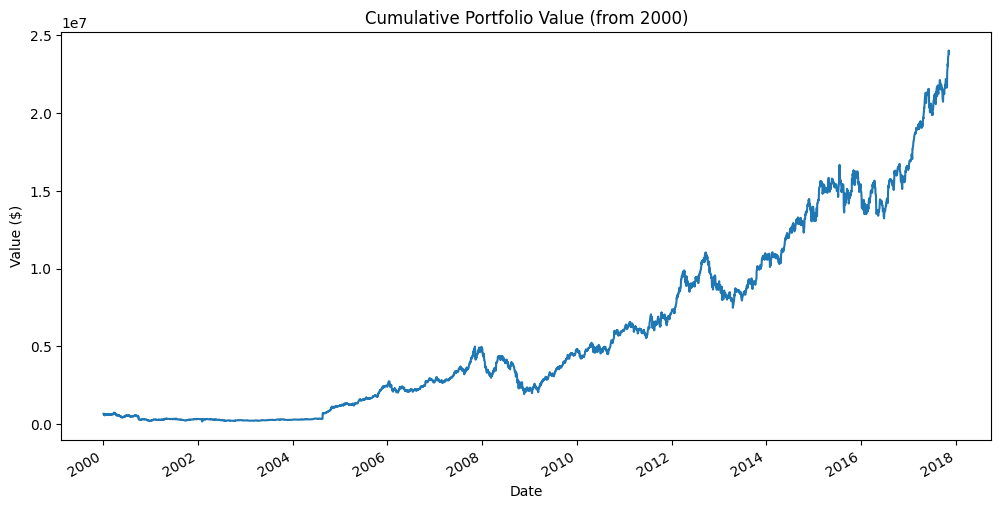

In [11]:
# Initialize an empty list to store the position values for each asset
all_pos = []
# Define sample data
assets = ['AAPL', 'GOOGL', 'MSFT']  # List of asset names
portfolio = [1/3, 1/3, 1/3]  # Portfolio weights
file_mapping = {'AAPL': './dataset/aapl.us.txt', 'GOOGL': './dataset/googl.us.txt', 'MSFT': './dataset/msft.us.txt'}  # File name mapping
investment = 1000000  # Initial investment amount
# Loop through each asset and its corresponding portfolio weight
for asset, p in zip(assets, portfolio):
    # Read the historical data for the asset from the respective file
    data = read_data(file_mapping[asset])
    # Filter the data to include only records from the year 2000 onwards
    data = data[data.index >= '2000-01-01']
    # Create a DataFrame with the closing prices
    data = pd.DataFrame(data['Close'])
    # Calculate normalized returns (returns relative to the initial closing price)
    data['Norm return'] = data['Close'] / data.iloc[0]['Close']
    # Calculate the allocation (normalized returns multiplied by the portfolio weight)
    data['Allocation'] = data['Norm return'] * p
    # Calculate the position values (allocation multiplied by the initial investment amount)
    data['Position'] = data['Allocation'] * investment
    # Add the position values DataFrame to the list
    all_pos.append(data['Position'])
# Concatenate the position values along the columns (axis=1) to create a DataFrame with three columns
portf_val = pd.concat(all_pos, axis=1)
# Set the column names of the DataFrame to the asset names
portf_val.columns = assets
# Sum the 'Position' columns to get the overall portfolio position
portfolio_value = portf_val.sum(axis=1)
# Plot the cumulative portfolio value
plt.figure(figsize=(12, 6))
portfolio_value.plot()
plt.title('Cumulative Portfolio Value (from 2000)')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.show()

The results indicate that the cumulative value of the portfolio has shown a long-term upward trend since 2000, with significant growth particularly after 2010. However, there were periods of volatility between 2000 and 2003, and from 2008 to 2009, reflecting the dot-com bubble burst and the financial crisis, respectively. Following these periods of decline, the portfolio recovered and experienced a sharp increase, especially from 2013 onwards, with the cumulative value reaching its peak recently. This information is useful for understanding past market trends and formulating future investment strategies.

## **Concatenation of Position Values for Each Asset and Plotting the Total Portfolio Value**
This code concatenates the position values of each asset into a single DataFrame with the asset names as column headers, adds a new column called "Total" that represents the sum of the position values of all assets to calculate the overall portfolio value, and then plots the total portfolio value over time, enabling a comprehensive and visual analysis of the performance of individual assets and the cumulative value of the portfolio.

In [12]:
# Concatenate the position values for each asset
# axis=0 concatenates along rows, axis=1 concatenates along columns (3 columns)
portf_val = pd.concat(all_pos, axis=1)
# Set the column names of the DataFrame to the asset names
portf_val.columns = assets
# Add a new column 'Total', which is the sum of the position values of all assets
portf_val['Total'] = portf_val.sum(axis=1)

This code plots the total portfolio value over time. Specifically, it plots all columns of the portf_val DataFrame, which includes the position values for each asset and the total portfolio value ("Total"). This allows for a visual examination of how the performance of individual assets has changed over time, as well as how the cumulative value of the portfolio has fluctuated. This information is useful for evaluating the overall performance of the investment portfolio and understanding the impact of individual assets on the entire portfolio.

<Axes: xlabel='Date'>

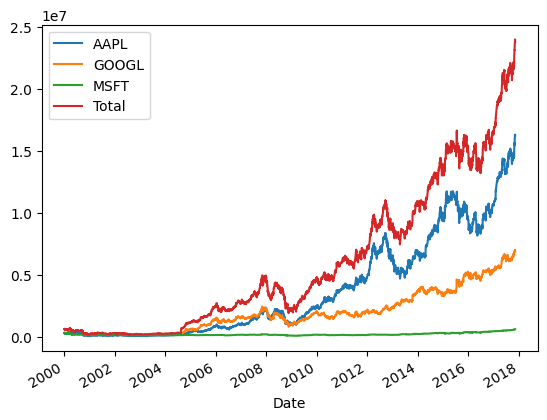

In [13]:
# Plot the total portfolio value over time
portf_val.plot()

This code calculates the cumulative return of the portfolio and outputs the result.

In [14]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (portf_val['Total'][-1] / portf_val['Total'][0] - 1)
# Print the cumulative return
print(f'\nThe cumulative return is: {cumulative_return:.2f}%\n\n')


The cumulative return is: 3473.53%




C:\Users\takah\AppData\Local\Temp\ipykernel_20348\3313535374.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



## **Calculating and Plotting Portfolio Growth Rate**
This code calculates the portfolio growth rate and plots the results. It first copies the portfolio value DataFrame to create a new DataFrame, calculates the daily percentage change for each column, and then plots these growth rates to visually examine the variations over time.

C:\Users\takah\AppData\Local\Temp\ipykernel_20348\523095314.py:5: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



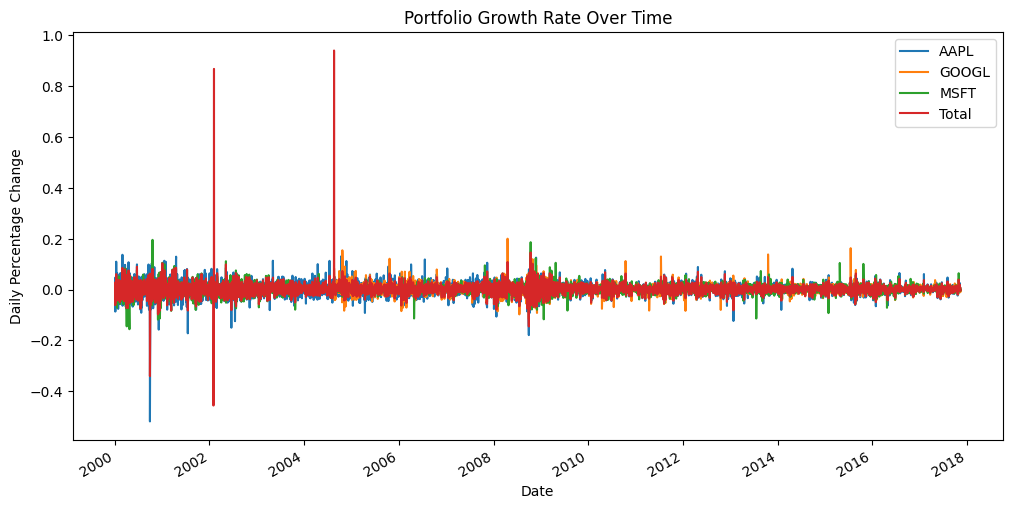

In [15]:
# Copy the portfolio value DataFrame
portf_val_growth = portf_val.copy()
# Calculate the daily percentage change for each column in the DataFrame
for column in portf_val_growth.columns:
    portf_val_growth[column] = portf_val_growth[column].pct_change(1)
# Plot the growth rate of the portfolio value
ax = portf_val_growth.plot(figsize=(12, 6))
# Set the title and labels for the plot
ax.set_title('Portfolio Growth Rate Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Percentage Change')
# Display the legend
ax.legend(loc='best')
# Show the plot
plt.show()

This graph shows the growth rates of Apple (AAPL), Microsoft (MSFT), Google (GOOGL) stock prices, and their portfolio. Individual stock prices exhibit varying levels of volatility over time, with significant fluctuations observed around the 2008 financial crisis. In contrast, the overall portfolio (in red) demonstrates a relatively stable growth rate, indicating risk mitigation through diversification. Over the long term, despite being influenced by market events, the portfolio shows stable growth. The 2008 financial crisis had a significant impact on stock prices, but stability is observed in the subsequent period. This graph highlights the importance of risk diversification and the effectiveness of a portfolio strategy.

## **Calculation and Plotting of Sharpe Ratios for Portfolio Assets and the Overall Portfolio**
I read the data for each stock and filter it to a common date range. Next, I calculate the daily returns for each stock and determine the overall portfolio's daily returns by averaging these daily returns. Finally, I calculate the Sharpe ratios for each stock and the overall portfolio and display them as a bar chart.

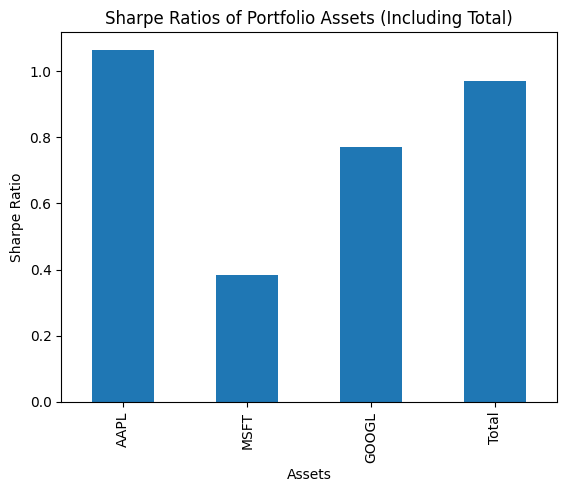

In [17]:
# Define the number of trading days in a year
N = 255
# Define the risk-free rate
rf = 0.042  # 4.2%
# Define a function to calculate the Sharpe ratio
def sharpe_ratio(return_series, N, rf):
    mean = (return_series.mean() * N) - rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma
# Step 1: Read and prepare data
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')
data_aapl = read_data('./dataset/aapl.us.txt')
data_msft = read_data('./dataset/msft.us.txt')
data_googl = read_data('./dataset/googl.us.txt')
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = ['AAPL', 'MSFT', 'GOOGL']
# Filter data to the common date range
common_start_date = '2004-08-19'
common_end_date = '2017-11-10'
data = data[(data.index >= common_start_date) & (data.index <= common_end_date)]
# Step 2: Create portfolio growth data
portf_val_growth = data.pct_change().dropna()
# Calculate the total portfolio's daily percentage change (equal weight)
portf_val_growth['Total'] = portf_val_growth.mean(axis=1)
# Step 3: Calculate and plot Sharpe ratios
sharpes = portf_val_growth.apply(sharpe_ratio, args=(N, rf), axis=0)
sharpes.plot.bar(title="Sharpe Ratios of Portfolio Assets (Including Total)")
plt.xlabel('Assets')
plt.ylabel('Sharpe Ratio')
plt.show()

Calculates the Sortino ratio for each asset in the portfolio and displays the results as a bar chart.

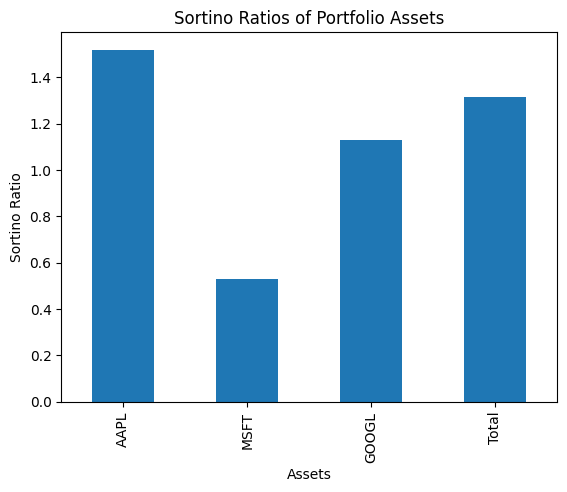

In [18]:
# Define the number of trading days in a year
N = 255
# Define the risk-free rate
rf = 0.042  # 4.2%
# Define a function to calculate the Sortino ratio
def sortino_ratio(series, N, rf):
    mean = series.mean() * N - rf
    std_neg = series[series < 0].std() * np.sqrt(N)
    return mean / std_neg
# Apply the Sortino ratio function to each column in the portf_val_growth DataFrame
sortinos = portf_val_growth.apply(sortino_ratio, args=(N, rf), axis=0)
# Plot the Sortino ratios of the portfolio assets
sortinos.plot.bar(title="Sortino Ratios of Portfolio Assets")
plt.xlabel('Assets')
plt.ylabel('Sortino Ratio')
plt.show()

The following insights can be derived from each output graph:

### Sharpe Ratio:

1. Apple (AAPL): The Sharpe ratio is over 1.0, indicating a very high return relative to risk. This means Apple's stock provides returns that more than compensate for the investment risk.
2. Microsoft (MSFT): The Sharpe ratio is around 0.4, the lowest among the three companies. This indicates that Microsoft's stock has relatively low risk-adjusted returns.
3. Google (GOOGL): The Sharpe ratio is about 0.7, higher than Microsoft but lower than Apple. This means Google's stock provides moderate risk-adjusted returns.
4. Overall Portfolio: The Sharpe ratio is about 0.9, showing slightly more stable risk-adjusted returns compared to individual stocks. This indicates that the diversification effect of the portfolio reduces risk and stabilizes returns.

### Sortino Ratio:

1. Apple (AAPL): The Sortino ratio is approximately 1.4, indicating very high returns relative to risk (particularly negative volatility).
2. Microsoft (MSFT): The Sortino ratio is around 0.5, indicating low returns relative to negative volatility.
3. Google (GOOGL): The Sortino ratio is about 1.0, indicating moderate returns relative to negative volatility.
4. Overall Portfolio: The Sortino ratio is approximately 1.2, indicating that the portfolio provides relatively high returns even against negative volatility.


From these results, Apple shows the best performance in both risk-adjusted returns and returns relative to negative volatility. Microsoft shows the lowest performance in both metrics, while Google shows moderate performance. The overall portfolio provides stable returns due to the diversification effect. This confirms that Apple’s stock offers the highest value for investment, and that portfolio diversification is effective in reducing risk.

## **Stock price prediction and investment simulation using random forest**
Using the stock data of AAPL, MSFT, and GOOGL, I calculate technical indicators and perform stock price prediction using a Random Forest classifier. Based on the prediction results, I then conduct an investment simulation. The specific steps of the process are as follows: First, I import the necessary libraries and set the number of trading days per year and the risk-free rate. Next, I define a function to perform the investment simulation based on the prediction results. I read the data from CSV files for each stock and calculate technical indicators such as SMA, EMA, MACD, RSI, and Bollinger Bands, adding them as new columns. After concatenating the data frames for each stock and selecting the necessary features, I remove any missing values and standardize the features. I also use SMOTE to address class imbalance. I split the data into training and test sets and train a Random Forest classifier. I make predictions on the test data and display the confusion matrix and classification report. Finally, I use the model to generate predictions for the entire dataset and conduct an investment simulation based on the prediction results, plotting the results for visualization.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Confusion Matrix: 
[[202 136]
 [143 179]]

Report: 
              precision    recall  f1-score   support

         0.0       0.59      0.60      0.59       338
         1.0       0.57      0.56      0.56       322

    accuracy                           0.58       660
   macro avg       0.58      0.58      0.58       660
weighted avg       0.58      0.58      0.58       660



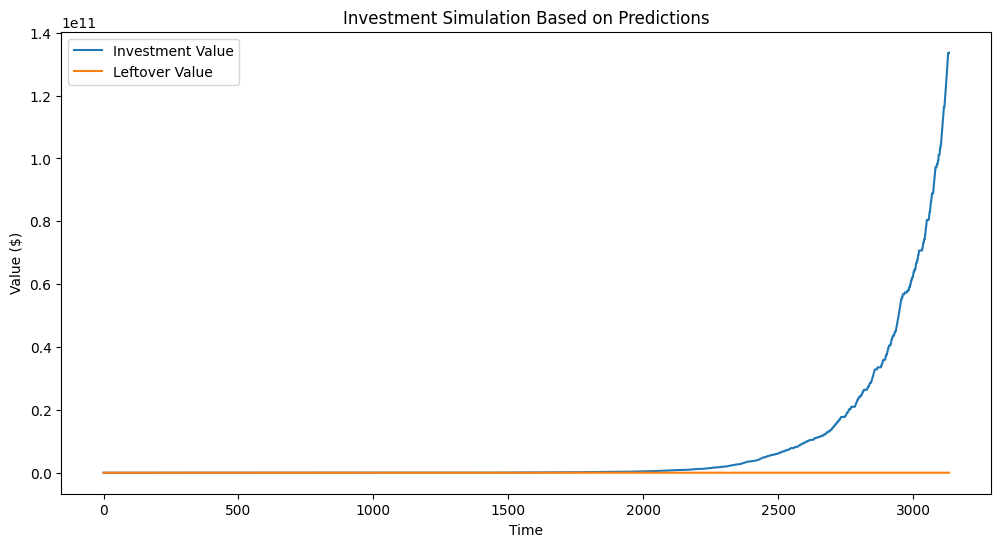

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
def Model_invest(predictions, initial_investment):
    investment_value = initial_investment
    results = []
    for prediction in predictions:
        if prediction == 1:  # Stock price is predicted to rise
            # Implement investment logic (e.g., invest the entire amount)
            investment_value *= 1.01  # Assuming a 1% profit
        else:  # Stock price is predicted to fall
            # Implement logic to refrain from investing
            pass
        results.append((investment_value, initial_investment))
    return results
# Function to read data
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Open', 'High', 'Low', 'Close'], parse_dates=['Date'], index_col='Date')
# Read multiple files
assets = ['AAPL', 'MSFT', 'GOOGL']
file_mapping = {
    'AAPL': './dataset/aapl.us.txt',
    'MSFT': './dataset/msft.us.txt',
    'GOOGL': './dataset/googl.us.txt'
}
# Read asset data and calculate technical indicators
data_frames = {}
for asset in assets:
    df = read_data(file_mapping[asset])
    df['Norm return'] = df['Close'] / df['Close'].iloc[0]
    df['Growth rate'] = df['Close'].pct_change()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['BB_upper'] = df['SMA_20'] + 2 * df['Close'].rolling(window=20).std()
    df['BB_lower'] = df['SMA_20'] - 2 * df['Close'].rolling(window=20).std()
    df['Action'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    df.dropna(inplace=True)
    data_frames[asset] = df
# Concatenate the DataFrames
combined_df = pd.concat(data_frames, axis=1)
# Select features
features = []
for asset in assets:
    asset_features = [(asset, 'Open'), (asset, 'High'), (asset, 'Low'), (asset, 'Close'), (asset, 'Norm return'), 
                      (asset, 'SMA_50'), (asset, 'SMA_200'), (asset, 'MACD'), (asset, 'Signal_Line'), (asset, 'RSI'), 
                      (asset, 'BB_upper'), (asset, 'BB_lower')]
    features.extend(asset_features)
# Define features and target variable
X = combined_df[features]
Y = combined_df[(assets[0], 'Action')]  # Using AAPL's Action as the target variable
# Remove NaN values
X = X.dropna()
Y = Y.loc[X.index]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Use SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)
# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)
# Use the best model to make predictions
best_rf_clf = grid_search.best_estimator_
Y_pred = best_rf_clf.predict(X_test)
# Display the confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
print("Confusion Matrix: ")
print(conf_matrix)
print("\nReport: ")
print(class_report)
# Generate predictions for the entire dataset
predictions = best_rf_clf.predict(X_scaled)
predictions_binary = (predictions >= 0.5).astype(int)
# Run the investment simulation
investment_results = Model_invest(predictions_binary, 10000)
# Plot the investment results
investment_values, leftover_values = zip(*investment_results)
plt.figure(figsize=(12, 6))
plt.plot(investment_values, label='Investment Value')
plt.plot(leftover_values, label='Leftover Value')
plt.title('Investment Simulation Based on Predictions')
plt.xlabel('Time')
plt.ylabel('Value ($)')
plt.legend()
plt.show()

### Investment Simulation Results
From the investment simulation graph:
The Investment Value line increases exponentially over time. This indicates that the investment value grows significantly based on the model's predictions.
The Leftover Value remains almost unchanged, indicating that the non-invested assets do not grow significantly in value.

#### Interpretation

Performance of the Prediction Model:
The overall accuracy of the model is 58%, meaning the model correctly predicts stock price increases about 58% of the time.
The precision and recall for each class are relatively balanced, but the overall performance is moderate. The number of false positives and false negatives is relatively high, indicating that the model's predictions are not perfect.

Investment Simulation Outcomes:
The investment simulation results show a significantly high investment value, suggesting that the prediction model can function effectively as an investment strategy. However, the simulation assumptions are simplistic, and real market conditions may not yield the same results.

## **Conclusion**
This program uses technical indicators and a Random Forest classifier to predict stock price increases and perform an investment simulation based on those predictions. While the model's predictive performance is moderate, the investment simulation results are highly positive. However, it is essential to consider the risks and market fluctuations in actual investment environments.

### **Appendix: Conducting an Investment Simulation**
The following program is designed to perform a simple investment simulation. It focuses on three assets: Apple (AAPL), Microsoft (MSFT), and Google (GOOGL). The model assumes an annual growth rate for each asset and simulates the performance of an initial investment over a period of 10 years.

Total investments over time: [11233.333333333334, 12623.0, 14189.343333333334, 15955.418700000002, 17947.362902333338, 20194.814836030004, 22731.39462624944, 25595.249496112912, 28829.6758012337, 32483.8280138404]


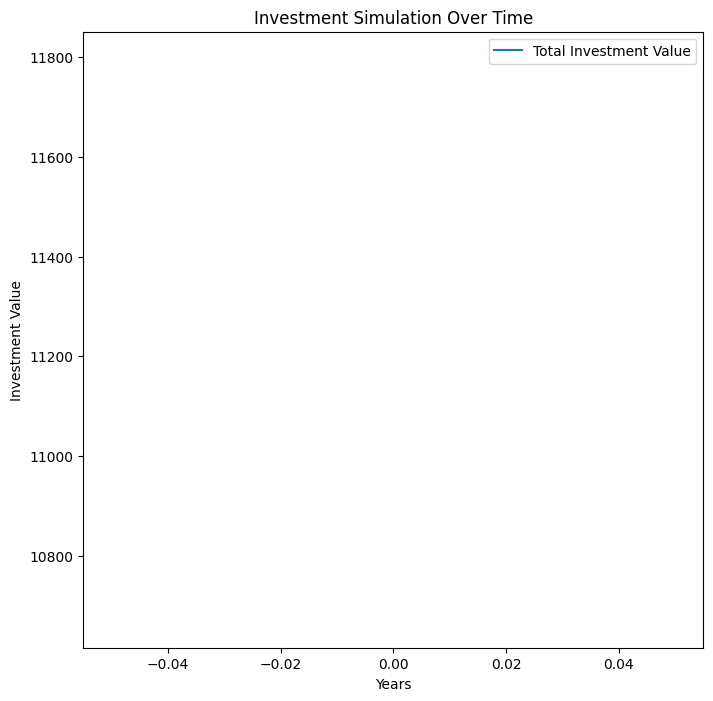

In [20]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import pandas as pd
class SimpleInvestmentModel:
    def __init__(self, assets, growth_rates, initial_investment, duration):
        self.assets = assets
        self.growth_rates = growth_rates
        self.initial_investment = initial_investment
        self.duration = duration
        self.total_investments = []
    def run_model(self):
        investment_values = [self.initial_investment / len(self.assets)] * len(self.assets)
        for year in range(self.duration):
            for i, asset in enumerate(self.assets):
                investment_values[i] *= (1 + self.growth_rates[i])
            self.total_investments.append(sum(investment_values))
    def return_total(self):
        return self.total_investments
# Data loading and preprocessing
assets = ['AAPL', 'MSFT', 'GOOGL']
growth_rates = [0.1, 0.12, 0.15]  # Assumed annual growth rates for each asset
# Running the investment simulation
initial_investment = 10000
duration = 10  # Simulation over 10 years
model = SimpleInvestmentModel(assets, growth_rates, initial_investment, duration)
model.run_model()
total_investments = model.return_total()
# Checking the results
print("Total investments over time:", total_investments)
# Creating the animation
fig, ax = plt.subplots(figsize=(8, 8))
def animate(i):
    ax.clear()
    ax.plot(range(i+1), total_investments[:i+1], label="Total Investment Value")
    ax.set_title("Investment Simulation Over Time")
    ax.set_xlabel("Years")
    ax.set_ylabel("Investment Value")
    ax.legend()
    return ax,
ani = FuncAnimation(fig, animate, frames=len(total_investments), interval=200, blit=False)
animation_html = HTML(ani.to_jshtml())
display(animation_html)

By using this program, you can conduct a 10-year investment simulation based on assumed annual growth rates and visualize changes in investment value. This simulation can aid in evaluating investment strategies and formulating future investment plans.